# GAVIN AND JAY COMPARISON
This notebook is used to compare Gavin and mine's model outputs

Code here is rough, not fully documented

In [1]:
import gavin_atm_disp as gav
import Atmospheric_diffraction as jay
from AD_analysis import *

za = [0,10,20,30,40,50,60]
Config_tel = ConfigObj('./Architecture_parameters/Telescope_conf.ini')

conditions = {} #Dictionary of environment conditions at Paranal
conditions['temperature']= float(Config_tel['EnvConditions']['AirTemperature']) * u.deg_C
conditions['humidity']= float(Config_tel['EnvConditions']['AirHumidity']) * u.percent
conditions['pressure']= float(Config_tel['EnvConditions']['AirPressure']) * u.mBa

def red_blue_seperation(config):
    seperations=[]
    for i in config:
        Config_regime = ConfigObj('./Architecture_parameters/'+i[0]+'_channel_conf.ini')
        sampling = -int(Config_regime[i[1]]['Bands'][i[2]]['wave_min'])+int(Config_regime[i[1]]['Bands'][i[3]]['wave_max'])
        analysis.load_wave(i[1],i[0],i[2],i[3],sampling * u.nm)
        analysis.calculate_shifts(fibrecentre_waveref = 100 * u.micron, reposition=False, guide_waveref=200 * u.micron)
        seperation=[]
        for o in analysis.output_parameters['shifts']:
            seperation.append(abs(o[0]-o[1]).value)
        seperations.append(seperation)
    return seperations

## Shift Comparisons
#### NIR

Zenith Angles Used


(0.0, 2.5)

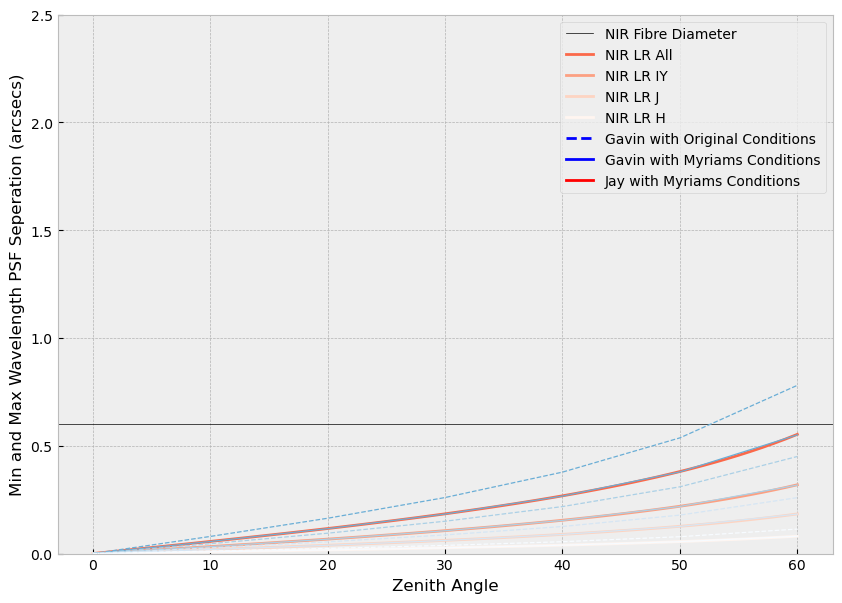

In [2]:
angles=ZA_range=np.arange(0,61)
analysis=AD_analysis()
analysis.load_airmasses(ZA_range=angles)

NIR_LR=[["NIR","LR","IY","H"],["NIR","LR","J","J"],["NIR","LR","IY","IY"],["NIR","LR","H","H"]]
VIS_LR=[["VIS","LR","B","R"],["VIS","LR","B","B"],["VIS","LR","V","V"],["VIS","LR","R","R"]]

NIR_LR_sep=red_blue_seperation(NIR_LR)
VIS_LR_sep=red_blue_seperation(VIS_LR)

weights4 = np.arange(0, 4+1)
norm4 = mpl.colors.Normalize(vmin=min(weights4), vmax=max(weights4))
cmap4_1 = mpl.cm.ScalarMappable(norm=norm4, cmap=mpl.cm.Reds)
cmap4_2 = mpl.cm.ScalarMappable(norm=norm4, cmap=mpl.cm.Blues)

lr5=gav.atmosdisp(0.77,1.063,za,534.04,11.5,obsalt=3.,water=2.)
lr6=gav.atmosdisp(1.01,1.395,za,534.04,11.5,obsalt=3.,water=2.)
lr7=gav.atmosdisp(1.42,1.857,za,534.04,11.5,obsalt=3.,water=2.)
lr8=gav.atmosdisp(0.77,1.857,za,534.04,11.5,obsalt=3.,water=2.)

lr51=gav.atmosdisp(0.77,1.063,za,700,-10,obsalt=3.,water=2.)
lr61=gav.atmosdisp(1.01,1.395,za,700,-10,obsalt=3.,water=2.)
lr71=gav.atmosdisp(1.42,1.857,za,700,-10,obsalt=3.,water=2.)
lr81=gav.atmosdisp(0.77,1.857,za,700,-10,obsalt=3.,water=2.)

fig, ax = plt.subplots(figsize=(10,7))
weights = np.arange(1, len(za)+1)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)

plt.axhline(0.6,color='black',linewidth=0.5,label='NIR Fibre Diameter')
plt.plot(angles,NIR_LR_sep[0],label="NIR LR All",color=cmap.to_rgba(4))
plt.plot(angles,NIR_LR_sep[2],label="NIR LR IY",color=cmap.to_rgba(3))
plt.plot(angles,NIR_LR_sep[1],label="NIR LR J",color=cmap.to_rgba(2))
plt.plot(angles,NIR_LR_sep[3],label="NIR LR H",color=cmap.to_rgba(1))

plt.plot(za,lr8,color=cmap2.to_rgba(4),linewidth=0.9)
plt.plot(za,lr5,color=cmap2.to_rgba(3),linewidth=0.9)
plt.plot(za,lr6,color=cmap2.to_rgba(2),linewidth=0.9)
plt.plot(za,lr7,color=cmap2.to_rgba(1),linewidth=0.9)

plt.plot(za,lr81,color=cmap2.to_rgba(4),linewidth=0.9, linestyle='--')
plt.plot(za,lr51,color=cmap2.to_rgba(3),linewidth=0.9, linestyle='--')
plt.plot(za,lr61,color=cmap2.to_rgba(2),linewidth=0.9, linestyle='--')
plt.plot(za,lr71,color=cmap2.to_rgba(1),linewidth=0.9, linestyle='--')    

plt.axhline(y=3,color='blue',linestyle='--',label='Gavin with Original Conditions')
plt.axhline(y=3,color='blue',label='Gavin with Myriams Conditions')
plt.axhline(y=3,color='red',label='Jay with Myriams Conditions')

plt.ylabel("Min and Max Wavelength PSF Seperation (arcsecs)")
plt.xlabel("Zenith Angle")
plt.legend()
plt.ylim(0,2.5)

### VIS

(0.0, 2.5)

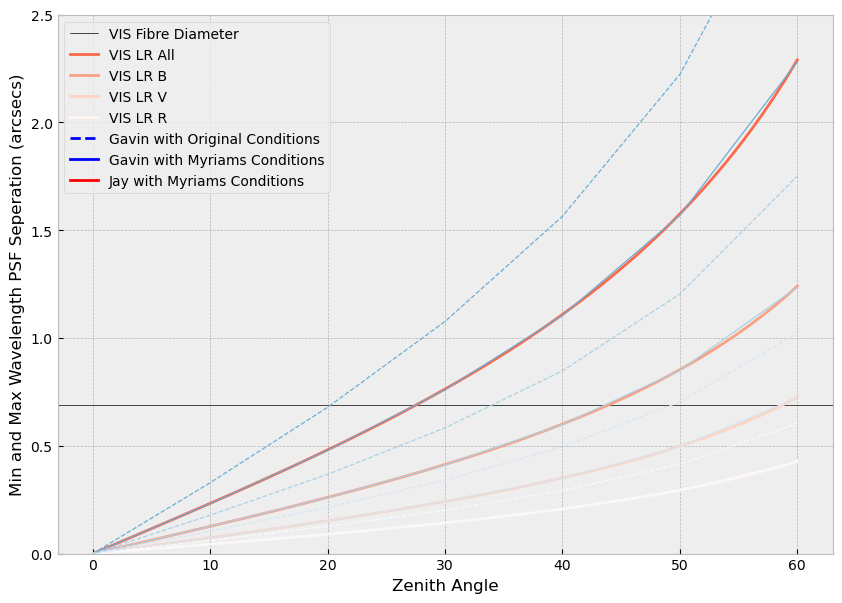

In [3]:
lr1=gav.atmosdisp(0.38,0.497,za,534.04,11.5,obsalt=3.,water=2.)
lr2=gav.atmosdisp(0.487,0.637,za,534.04,11.5,obsalt=3.,water=2.)
lr3=gav.atmosdisp(0.627,0.821,za,534.04,11.5,obsalt=3.,water=2.)
lr4=gav.atmosdisp(0.38,0.821,za,534.04,11.5,obsalt=3.,water=2.)

lr11=gav.atmosdisp(0.38,0.497,za,700,-10,obsalt=3.,water=2.)
lr21=gav.atmosdisp(0.487,0.637,za,700,-10,obsalt=3.,water=2.)
lr31=gav.atmosdisp(0.627,0.821,za,700,-10,obsalt=3.,water=2.)
lr41=gav.atmosdisp(0.38,0.821,za,700,-10,obsalt=3.,water=2.)

fig, ax = plt.subplots(figsize=(10,7))
plt.axhline(0.69,color='black',linewidth=0.5,label='VIS Fibre Diameter')
plt.plot(angles,VIS_LR_sep[0],label="VIS LR All",color=cmap.to_rgba(4))
plt.plot(angles,VIS_LR_sep[1],label="VIS LR B",color=cmap.to_rgba(3))
plt.plot(angles,VIS_LR_sep[2],label="VIS LR V",color=cmap.to_rgba(2))
plt.plot(angles,VIS_LR_sep[3],label="VIS LR R",color=cmap.to_rgba(1))

plt.plot(za,lr4,color=cmap2.to_rgba(4),linewidth=0.9)
plt.plot(za,lr3,color=cmap2.to_rgba(1),linewidth=0.9)
plt.plot(za,lr2,color=cmap2.to_rgba(2),linewidth=0.9)
plt.plot(za,lr1,color=cmap2.to_rgba(3),linewidth=0.9)

plt.plot(za,lr41,color=cmap2.to_rgba(4),linewidth=0.9, linestyle='--')
plt.plot(za,lr31,color=cmap2.to_rgba(1),linewidth=0.9, linestyle='--')
plt.plot(za,lr21,color=cmap2.to_rgba(2),linewidth=0.9, linestyle='--')
plt.plot(za,lr11,color=cmap2.to_rgba(3),linewidth=0.9, linestyle='--')    

plt.axhline(y=3,color='blue',linestyle='--',label='Gavin with Original Conditions')
plt.axhline(y=3,color='blue',label='Gavin with Myriams Conditions')
plt.axhline(y=3,color='red',label='Jay with Myriams Conditions')

plt.ylabel("Min and Max Wavelength PSF Seperation (arcsecs)")
plt.xlabel("Zenith Angle")
plt.legend()
plt.ylim(0,2.5)


## Transmission Comparisons
#### VIS

Zenith Angles Used


(0.0, 1.1)

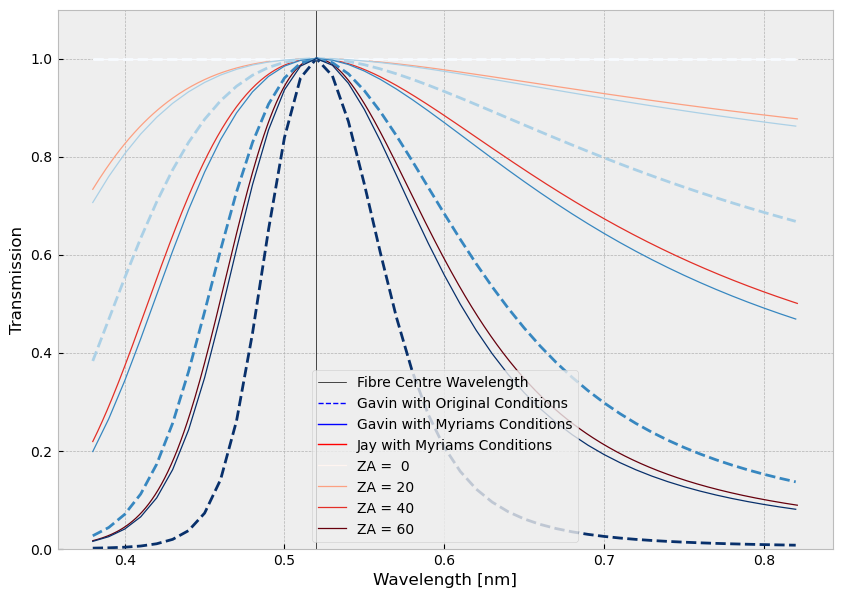

In [4]:
analysis=AD_analysis()
analysis.load_wave('LR','VIS','B','R',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,20,40,60])
analysis.calculate_shifts(fibrecentre_waveref = .52 * u.micron,reposition=True, guide_waveref=0.52 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=False, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)

ZA_range=analysis.input_parameters['ZA_range']
wave_wavelengths=analysis.output_parameters['wave_wavelengths']
fibre_diameter=analysis.output_parameters['fibre_diameter']
wave_transmissions=analysis.output_parameters['wave_transmissions']
fibrecentre_waveref=analysis.input_parameters['fibrecentre_waveref']
guide_waveref=analysis.input_parameters['guide_waveref']
median_FWHM=analysis.input_parameters['median_FWHM']
scale=analysis.input_parameters['scale']
beta=analysis.input_parameters['beta']

zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
zenith_centre_shift=jay.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
zenith_shifts=jay.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift

zenith_transmission = []
for i in range(0,len(zenith_FWHMs)):
    zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
    
wcen=.52
zarange=np.arange(0,65,20)
fig, ax = plt.subplots(figsize=(10,7))
wl =np.arange(0.380,.821,0.01)
apert=0.6
plt.axvline(wcen,color='black',linewidth=0.5,label='Fibre Centre Wavelength')
plt.axhline(1.2,color='blue',linewidth=1,linestyle='--',label='Gavin with Original Conditions')
plt.axhline(1.2,color='blue',linewidth=1,label='Gavin with Myriams Conditions')
plt.axhline(1.2,color='red',linewidth=1,label='Jay with Myriams Conditions')
weights = np.arange(1, len(zarange)+1)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)

for i in range(0,len(wave_transmissions)):
    plt.plot(wave_wavelengths/1000,np.array(wave_transmissions[i])/np.array(zenith_transmission),label='ZA = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1),linewidth=0.9)    
plt.ylabel("Transmission Relative to Zenith")

p=700
t=-10
seeing=0.5
k=0

for i in zarange:
    tp = []
    for j in wl:
        tp.append(gav.wavethrough(wcen,j,i,apert=apert,seeing=seeing,p=p,t=t))
    tt = np.asarray(tp)
    if (k == 0):
        t0 = tt
    k = k + 1
    plt.plot(wl,tt/t0,color=cmap2.to_rgba(k),linestyle='--')

seeing=0.68
p=534.04
t=11.5
k=0

for i in zarange:
    tp = []
    for j in wl:
        tp.append(gav.wavethrough(wcen,j,i,apert=apert,seeing=seeing,p=p,t=t))
    tt = np.asarray(tp)
    if (k == 0):
        t0 = tt
    k = k + 1
    plt.plot(wl,tt/t0,color=cmap2.to_rgba(k),linewidth=0.9)  
        
plt.legend()
plt.xlabel("Wavelength [nm]")
plt.ylabel("Transmission")
plt.ylim(0,1.1)

#### NIR

Zenith Angles Used


(0.0, 1.1)

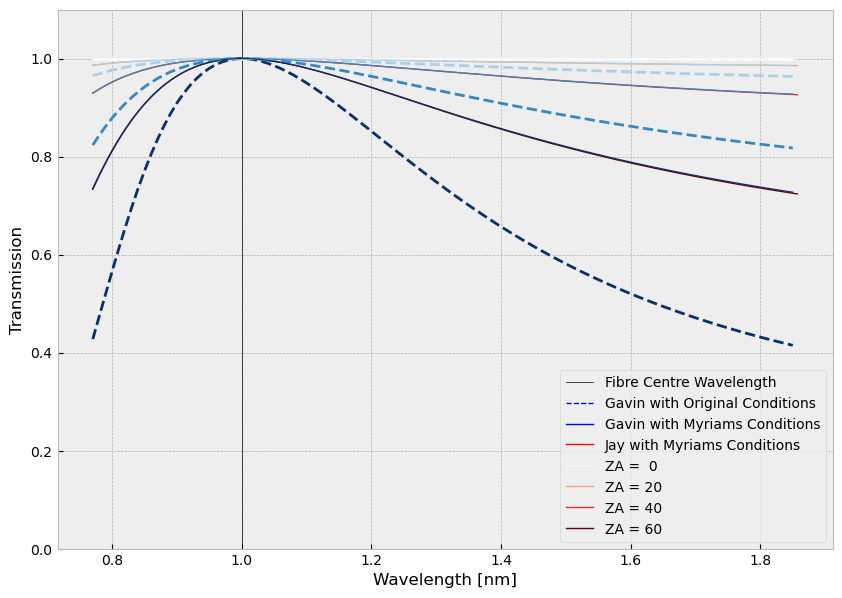

In [5]:
analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,20,40,60])
analysis.calculate_shifts(fibrecentre_waveref = 1 * u.micron,reposition=True, guide_waveref=0.52 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=False, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)

ZA_range=analysis.input_parameters['ZA_range']
wave_wavelengths=analysis.output_parameters['wave_wavelengths']
fibre_diameter=analysis.output_parameters['fibre_diameter']
wave_transmissions=analysis.output_parameters['wave_transmissions']
fibrecentre_waveref=analysis.input_parameters['fibrecentre_waveref']
guide_waveref=analysis.input_parameters['guide_waveref']
median_FWHM=analysis.input_parameters['median_FWHM']
scale=analysis.input_parameters['scale']
beta=analysis.input_parameters['beta']

zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
zenith_centre_shift=jay.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
zenith_shifts=jay.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift

zenith_transmission = []
for i in range(0,len(zenith_FWHMs)):
    zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
    
wcen=1
zarange=np.arange(0,65,20)
fig, ax = plt.subplots(figsize=(10,7))
wl =np.arange(0.77,1.857,0.01)
apert=0.6
plt.axvline(wcen,color='black',linewidth=0.5,label='Fibre Centre Wavelength')
plt.axhline(1.2,color='blue',linewidth=1,linestyle='--',label='Gavin with Original Conditions')
plt.axhline(1.2,color='blue',linewidth=1,label='Gavin with Myriams Conditions')
plt.axhline(1.2,color='red',linewidth=1,label='Jay with Myriams Conditions')
weights = np.arange(1, len(zarange)+1)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)

for i in range(0,len(wave_transmissions)):
    plt.plot(wave_wavelengths/1000,np.array(wave_transmissions[i])/np.array(zenith_transmission),label='ZA = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1),linewidth=1)    
plt.ylabel("Transmission Relative to Zenith")

p=700
t=-10
seeing=0.5
k=0

for i in zarange:
    tp = []
    for j in wl:
        tp.append(gav.wavethrough(wcen,j,i,apert=apert,seeing=seeing,p=p,t=t))
    tt = np.asarray(tp)
    if (k == 0):
        t0 = tt
    k = k + 1
    plt.plot(wl,tt/t0,color=cmap2.to_rgba(k),linestyle='--')

seeing=0.68
p=534.04
t=11.5
k=0

for i in zarange:
    tp = []
    for j in wl:
        tp.append(gav.wavethrough(wcen,j,i,apert=apert,seeing=seeing,p=p,t=t))
    tt = np.asarray(tp)
    if (k == 0):
        t0 = tt
    k = k + 1
    plt.plot(wl,tt/t0,color=cmap2.to_rgba(k),linewidth=0.9)
    
plt.legend()
plt.xlabel("Wavelength [nm]")
plt.ylabel("Transmission")
plt.ylim(0,1.1)

## Same Conditions Comparison
#### NIR

Zenith Angles Used


Text(0.5, 1.0, 'Aperture Centre = 1.1 microns, NIR All, Constant FWHM')

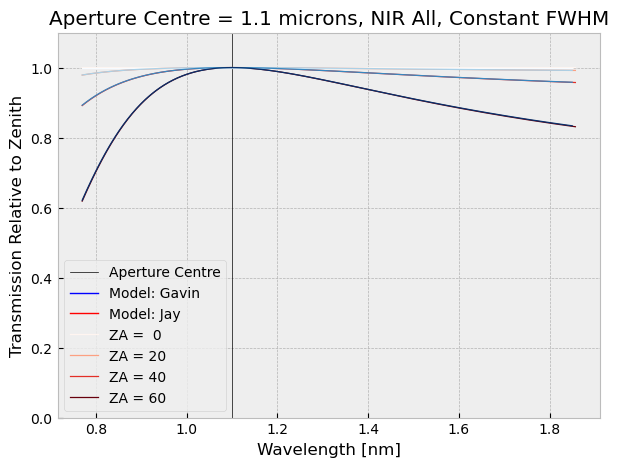

In [6]:
analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,20,40,60])
analysis.calculate_shifts(fibrecentre_waveref = 1.1 * u.micron,reposition=True, guide_waveref=1.1 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=False, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)

ZA_range=analysis.input_parameters['ZA_range']
wave_wavelengths=analysis.output_parameters['wave_wavelengths']
fibre_diameter=analysis.output_parameters['fibre_diameter']
wave_transmissions=analysis.output_parameters['wave_transmissions']
fibrecentre_waveref=analysis.input_parameters['fibrecentre_waveref']
guide_waveref=analysis.input_parameters['guide_waveref']
median_FWHM=analysis.input_parameters['median_FWHM']
scale=analysis.input_parameters['scale']
beta=analysis.input_parameters['beta']

zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
zenith_centre_shift=jay.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
zenith_shifts=jay.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift

zenith_transmission = []
for i in range(0,len(zenith_FWHMs)):
    zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
    
wcen=1.1
zarange=np.arange(0,65,20)
fig, ax = plt.subplots(figsize=(7,5))
wl =np.arange(0.77,1.857,0.01)
apert=0.6

plt.axvline(wcen,color='black',linewidth=0.5,label='Aperture Centre')
plt.axhline(1.2,color='blue',linewidth=1,label='Model: Gavin')
plt.axhline(1.2,color='red',linewidth=1,label='Model: Jay')

weights = np.arange(1, len(zarange)+1)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)

for i in range(0,len(wave_transmissions)):
    plt.plot(wave_wavelengths/1000,np.array(wave_transmissions[i])/np.array(zenith_transmission),label='ZA = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1),linewidth=0.9)    
plt.ylabel("Transmission Relative to Zenith")

seeing=0.68
p=534.04
t=11.5
k=0

for i in zarange:
    tp = []
    for j in wl:
        tp.append(gav.wavethrough(wcen,j,i,apert=apert,seeing=seeing,p=p,t=t))
    tt = np.asarray(tp)
    if (k == 0):
        t0 = tt
    k = k + 1
    plt.plot(wl,tt/t0,color=cmap2.to_rgba(k),linewidth=0.9)
     
plt.legend()
plt.xlabel("Wavelength [nm]")
plt.ylabel("Transmission Relative to Zenith")
plt.ylim(0,1.1)
plt.title("Aperture Centre = 1.1 microns, NIR All, Constant FWHM")

#### VIS

Zenith Angles Used


Text(0.5, 1.0, 'Aperture Centre = 0.5 microns, VIS All, Constant FWHM')

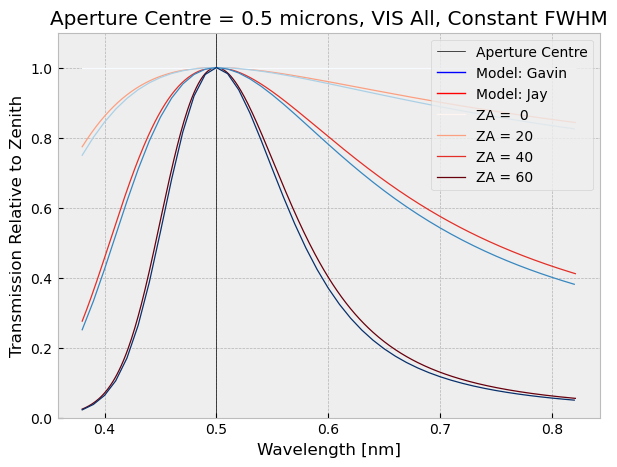

In [7]:
analysis=AD_analysis()
analysis.load_wave('LR','VIS','B','R',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,20,40,60])
analysis.calculate_shifts(fibrecentre_waveref = .5 * u.micron,reposition=True, guide_waveref=0.5 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=False, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)

airmasses=analysis.output_parameters['airmasses']
ZA_range=analysis.input_parameters['ZA_range']
HA_range=analysis.input_parameters['HA_range']

wave_wavelengths=analysis.output_parameters['wave_wavelengths']
fibre_diameter=analysis.output_parameters['fibre_diameter']
wave_transmissions=analysis.output_parameters['wave_transmissions']

fibrecentre_waveref=analysis.input_parameters['fibrecentre_waveref']
guide_waveref=analysis.input_parameters['guide_waveref']
median_FWHM=analysis.input_parameters['median_FWHM']
median_FWHM_lambda=analysis.input_parameters['median_FWHM_lambda']
kolb_factor=analysis.input_parameters['kolb_factor']
regime=analysis.input_parameters['regime']
res=analysis.input_parameters['res']
k_lim=analysis.input_parameters['k_lim']
FWHM_change=analysis.input_parameters['FWHM_change']
scale=analysis.input_parameters['scale']
method=analysis.input_parameters['method']
beta=analysis.input_parameters['beta']
band=analysis.input_parameters['band']
reposition=analysis.input_parameters['reposition']
targ_dec=analysis.input_parameters['targ_dec']

zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
zenith_centre_shift=jay.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
zenith_shifts=jay.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift

zenith_transmission = []
for i in range(0,len(zenith_FWHMs)):
    zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
    
wcen=.5
zarange=np.arange(0,65,20)
fig, ax = plt.subplots(figsize=(7,5))
wl =np.arange(0.380,.821,0.01)
apert=0.6

plt.axvline(wcen,color='black',linewidth=0.5,label='Aperture Centre')
plt.axhline(1.2,color='blue',linewidth=1,label='Model: Gavin')
plt.axhline(1.2,color='red',linewidth=1,label='Model: Jay')

weights = np.arange(1, len(zarange)+1)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)

for i in range(0,len(wave_transmissions)):
    plt.plot(wave_wavelengths/1000,np.array(wave_transmissions[i])/np.array(zenith_transmission),label='ZA = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1),linewidth=0.9)    
plt.ylabel("Transmission Relative to Zenith")

seeing=0.68
p=534.04
t=11.5
k=0

for i in zarange:
    tp = []
    for j in wl:
        tp.append(gav.wavethrough(wcen,j,i,apert=apert,seeing=seeing,p=p,t=t))
    tt = np.asarray(tp)
    if (k == 0):
        t0 = tt
    k = k + 1
    plt.plot(wl,tt/t0,color=cmap2.to_rgba(k),linewidth=0.9)
    
plt.legend(loc=1)
plt.xlabel("Wavelength [nm]")
plt.ylabel("Transmission Relative to Zenith")
plt.ylim(0,1.1)
plt.title("Aperture Centre = 0.5 microns, VIS All, Constant FWHM")
 